**Import Libraries**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import lightgbm as lgb

# **Load the Data**

In [12]:
def load_data(file_path):
    """
    Load the AQI data from a CSV file.

    Args:
    file_path (str): The path to the CSV file containing AQI data.

    Returns:
    DataFrame: A pandas DataFrame containing the AQI data.
    """
    return pd.read_csv("city_day.csv")

# Load the data
df = 'city_day.csv'
data = load_data(df)

In [13]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [14]:
data.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [15]:
data.shape

(29531, 16)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [17]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [18]:
data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [19]:
data.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


**Looking For Null Values**

In [20]:
missing_values = pd.DataFrame()
missing_values['column'] = data.columns

missing_values['percent'] = [round(100* data[col].isnull().sum() / len(df), 2) for col in data.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]

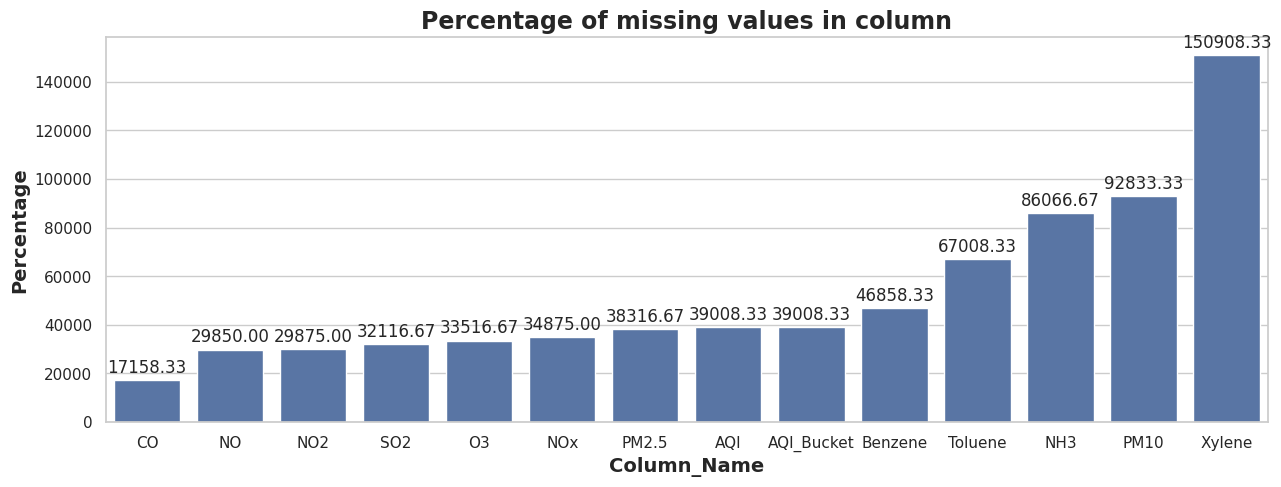

In [21]:
plt.figure(figsize=(15, 5))
sns.set(style='whitegrid', color_codes=True)
splot=sns.barplot(x='column', y='percent', data=missing_values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.ylabel("Percentage", size=14, weight="bold")
plt.title("Percentage of missing values in column",fontweight="bold",size=17)
plt.show()

**Heat Map for missing values**

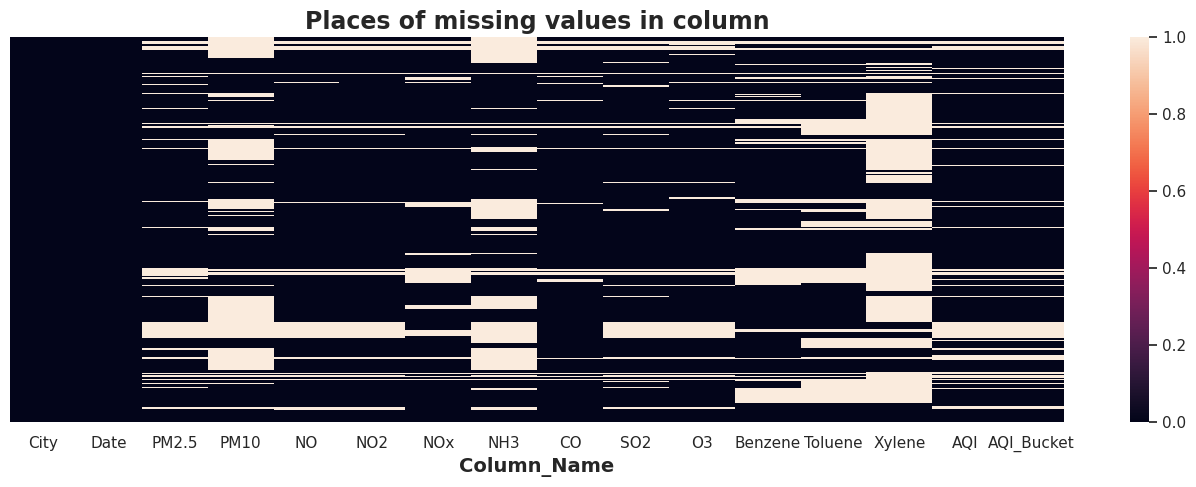

In [22]:
plt.figure(figsize=(17, 5))
sns.heatmap(data.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

**Unique Values In Each Feature Coulmn**

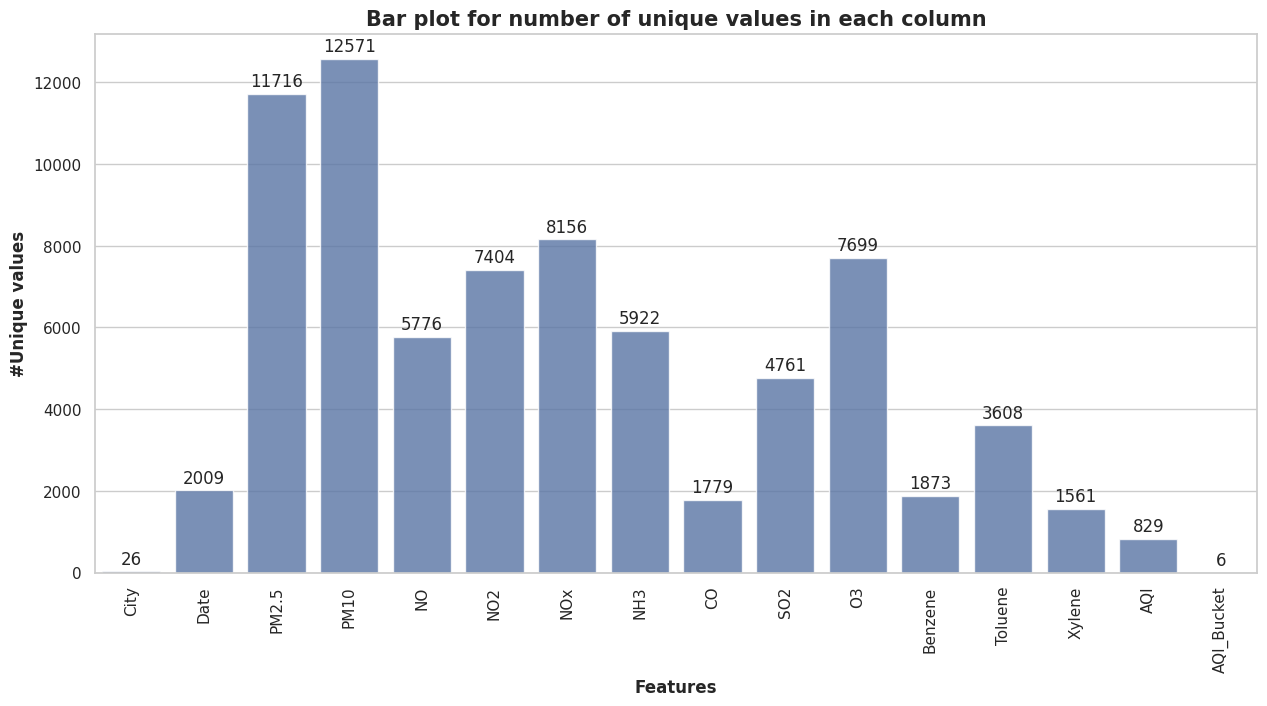

In [23]:
unique_df = pd.DataFrame()
unique_df['Features'] = data.columns
unique=[]
for i in data.columns:
    unique.append(data[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

In [24]:
# Fill numerical columns with their median
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Fill categorical columns with their mode (most frequent value)
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# 2. Sorting categorical columns with custom order
# Example column: 'Performance' with categories 'Good', 'Average', 'Poor', 'Very Poor'
from pandas.api.types import CategoricalDtype

performance_order = CategoricalDtype(
    categories=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'],
    ordered=True
)

# Apply custom sorting to the 'Performance' column
data['AQI_Bucket'] = data['AQI_Bucket'].astype(performance_order)

# Sort the DataFrame based on the 'Performance' column
data_sorted = data.sort_values(by='AQI_Bucket')

# Save the sorted DataFrame to a new CSV file
data_sorted.to_csv('sorted_data.csv', index=False)

print(data_sorted.head())

                City        Date  PM2.5   PM10    NO    NO2    NOx    NH3  \
29530  Visakhapatnam  2020-07-01  15.00  66.00  0.40  26.85  14.05   5.20   
19528        Kolkata  2019-08-19  13.95  30.32  6.97  15.32  22.21  11.51   
19527        Kolkata  2019-08-18  18.30  24.30  4.80  13.58  18.57  11.63   
19526        Kolkata  2019-08-17  20.92  26.95  7.49  19.29  27.00  14.84   
4817       Bengaluru  2016-06-07  48.57  20.31  2.60  11.68   7.43  15.85   

         CO   SO2     O3  Benzene  Toluene  Xylene   AQI AQI_Bucket  
29530  0.59  2.10  17.05     1.07     2.97    0.98  50.0       Good  
19528  0.44  2.37  20.74    24.65     7.78    2.10  39.0       Good  
19527  0.46  2.49  23.59    29.97     7.07    2.49  46.0       Good  
19526  0.57  2.14  15.60    38.98     9.96    3.10  48.0       Good  
4817   0.36  1.69  30.84     1.07     2.97    0.98  23.0       Good  


**Handle Missing Values**

In [25]:
def handle_missing_values(data):
    """
    Fill and find missing values in the DataFrame.

    Args:
    data (DataFrame): The DataFrame to process.

    Returns:
    DataFrame: The DataFrame with missing values handled.
    """
    # Fill missing values for numeric columns with the mean
    numeric_cols = data.select_dtypes(include=['number']).columns
    data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

    # Fill missing values for object columns with the mode
    object_cols = data.select_dtypes(include=['object']).columns
    for col in object_cols:
        data[col].fillna(data[col].mode()[0], inplace=True)

    # Check for any remaining missing values
    missing_values = data.isnull().sum()
    return data, missing_values

# Handle missing values
data, missing_values = handle_missing_values(data)
print(missing_values)

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


<ipython-input-25-ebaa35143c0a>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


**Sort AQI Categories**

In [26]:
def sort_aqi_categories(data):
    """
    Sort AQI categories from Good to Severe.

    Args:
    data (DataFrame): The DataFrame with AQI categories.

    Returns:
    DataFrame: The DataFrame with sorted AQI categories.
    """
    category_order = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']
    data['AQI_Bucket'] = pd.Categorical(data['AQI_Bucket'], categories=category_order, ordered=True)
    return data.sort_values('AQI_Bucket')
aqi_data = sort_aqi_categories(data)

In [27]:
aqi_data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,1.07,2.97,0.98,50.0,Good
19528,Kolkata,2019-08-19,13.95,30.32,6.97,15.32,22.21,11.51,0.44,2.37,20.74,24.65,7.78,2.10,39.0,Good
19527,Kolkata,2019-08-18,18.30,24.30,4.80,13.58,18.57,11.63,0.46,2.49,23.59,29.97,7.07,2.49,46.0,Good
19526,Kolkata,2019-08-17,20.92,26.95,7.49,19.29,27.00,14.84,0.57,2.14,15.60,38.98,9.96,3.10,48.0,Good
4817,Bengaluru,2016-06-07,48.57,20.31,2.60,11.68,7.43,15.85,0.36,1.69,30.84,1.07,2.97,0.98,23.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20593,Lucknow,2017-01-17,240.42,95.68,17.87,50.70,23.52,15.85,2.02,7.72,31.55,1.76,6.09,0.98,419.0,Severe
20592,Lucknow,2017-01-16,336.07,95.68,102.44,83.21,23.52,15.85,3.41,11.41,35.47,3.17,14.21,0.98,455.0,Severe
25519,Patna,2019-12-12,243.08,95.68,22.68,24.43,31.44,15.85,2.08,10.48,23.65,2.54,7.40,7.42,406.0,Severe
1742,Ahmedabad,2019-10-09,108.07,195.19,82.73,204.06,176.45,15.85,82.73,130.56,67.73,1.15,23.37,2.04,1389.0,Severe


**Split Data into Sets**

In [28]:
# 1. First, split into training + temp (where temp will later be split into validation and test)
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)

# 2. Now, split the temp_data into validation and test sets
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Output the sizes of the datasets
print(f"Training set: {train_data.shape}")
print(f"Validation set: {val_data.shape}")
print(f"Test set: {test_data.shape}")

# Optionally, save the datasets to CSV files
train_data.to_csv('train_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

Training set: (20671, 16)
Validation set: (4430, 16)
Test set: (4430, 16)


In [29]:
val_data, test_data

(                     City        Date   PM2.5    PM10      NO     NO2    NOx  \
 5804            Bengaluru  2019-02-19   44.28   98.50    8.09   33.16  30.10   
 15394           Hyderabad  2017-03-27   57.61  144.64    9.53   39.40  10.90   
 28407       Visakhapatnam  2017-06-04   48.57   95.68    9.89   21.69   0.00   
 10957               Delhi  2016-12-29  339.96  535.68  103.69  108.76  33.56   
 27953  Thiruvananthapuram  2020-03-08   28.37   54.46    7.83   10.35  10.24   
 ...                   ...         ...     ...     ...     ...     ...    ...   
 13972            Gurugram  2020-03-17   76.84  169.80    8.85   25.66  22.97   
 26929             Talcher  2020-06-04   51.86  103.71    9.89   21.69   0.00   
 26977  Thiruvananthapuram  2017-07-06   19.08   55.04    1.90    4.62   3.99   
 6656         Brajrajnagar  2018-02-09  107.02  206.24   16.15   27.87  44.01   
 6607         Brajrajnagar  2017-12-22   48.57   95.68    0.02    0.02   0.04   
 
          NH3    CO    SO2

# **LogisticRegression**

In [30]:
# Step 1: Handle categorical data by encoding

# Label Encoding (for target variable 'AQI_Bucket')
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['AQI_Bucket'])  # Encoded target

# One-Hot Encoding for categorical features (e.g., 'City', etc.)
X = pd.get_dummies(data.drop('AQI_Bucket', axis=1), drop_first=True)  # Encoded features

# Step 2: Split the data into training and temp sets
train_data, temp_data, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Split the temp data into validation and test sets
val_data, test_data, y_val, y_test = train_test_split(temp_data, y_temp, test_size=0.5, random_state=42)

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(train_data, y_train)

**Validation**

In [ ]:
y_val_pred = log_reg.predict(val_data)
val_accuracy = accuracy_score(y_val, y_val_pred)

In [ ]:
print(f"Validation Accuracy: {val_accuracy:.2f}")
print("Validation Confusion Matrix:")

In [ ]:
print(confusion_matrix(y_val, y_val_pred))
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

**Test**

In [ ]:
y_test_pred = log_reg.predict(test_data)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [ ]:
print(f"Test Accuracy: {test_accuracy:.2f}")
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# **Support Vector Machine Classifer**

In [ ]:
from sklearn.svm import SVC

svc = SVC()

In [ ]:
svc.fit(train_data, y_train)

**Vlidation**

In [ ]:
y_val_pred = svc.predict(val_data)
val_accuracy = accuracy_score(y_val, y_val_pred)

In [ ]:
print(f"Validation Accuracy: {val_accuracy:.2f}")

In [ ]:
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

**Test**

In [ ]:
y_test_pred = svc.predict(test_data)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [ ]:
print(f"Test Accuracy: {test_accuracy:.2f}")
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_data, y_train)

In [ ]:
y_pred_lr = lr.predict(test_data)
print("Predicted Values:\n", y_pred_lr)

LightGBM Model

In [ ]:
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(train_data, y_train)

In [ ]:
y_pred_lgb = lgb_model.predict(test_data)
print("Predicted Values:\n", y_pred_lgb)

 Random Forest Model

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(train_data, y_train)

In [ ]:
y_pred_rf = rf.predict(test_data)
print("Predicted Values:\n", y_pred_rf)

**Plotly Graph**

In [ ]:
import plotly.graph_objects as go

In [ ]:
loc_analysis = pd.DataFrame(data['City'].value_counts().sort_values(ascending=False))
loc_analysis = loc_analysis.rename(columns={'City':'count'})

In [ ]:
data = {
   "values": loc_analysis['count'][:15],
   "labels": loc_analysis.index[:15],
   "domain": {"column": 0},
   "name": "City",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Ratio on City</b>", legend=dict(x=0.1, y=1.1, orientation="h"))

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()

LinearRegression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(train_data, y_train)
y_val_pred = lin_reg.predict(val_data)

In [ ]:
# Calculate the mean squared error and R-squared value for validation
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation Mean Squared Error: {val_mse:.2f}")
print(f"Validation R-squared: {val_r2:.2f}")

# Step 6: Final evaluation on the test set
y_test_pred = lin_reg.predict(test_data)

# Calculate the mean squared error and R-squared value for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {test_mse:.2f}")
print(f"Test R-squared: {test_r2:.2f}")

**Bar Graph of Logistic Regression and SVc**

In [ ]:
model_names = ["Logistic Regression", "SVC"]
accuracy_values = [accuracy_score(y_val, log_reg.predict(val_data)),
                   accuracy_score(y_val, svc.predict(val_data))]

# Plot bar graph
plt.figure(figsize=(6, 4))
plt.bar(model_names, accuracy_values, color=['blue', 'green'])

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Classification Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

**Comparsion of All Modles in Bargraph**

In [ ]:
# Classification Model Accuracy
log_reg_acc = accuracy_score(y_val, log_reg.predict(val_data))
svc_acc = accuracy_score(y_val, svc.predict(val_data))

# Regression Model RMSE
lr_rmse = np.sqrt(mean_squared_error(y_test, lr.predict(test_data)))
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_model.predict(test_data)))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf.predict(test_data)))

# Data for visualization
model_names = ["Logistic Regression", "SVC", "Linear Regression", "LightGBM", "Random Forest"]
scores = [log_reg_acc, svc_acc, lr_rmse, lgb_rmse, rf_rmse]
metrics = ["Accuracy", "Accuracy", "RMSE", "RMSE", "RMSE"]

df = pd.DataFrame({"Model": model_names, "Score": scores, "Metric": metrics})

# Create Bar Graph
fig = px.bar(df, x="Model", y="Score", color="Metric",
             text=df["Score"].round(3),
             title="Model Performance Comparison",
             labels={"Score": "Performance Score"},
             color_discrete_map={"Accuracy": "blue", "RMSE": "red"})

fig.update_traces(textposition='outside')
fig.show()

In [ ]:
log_reg_acc = accuracy_score(y_val, log_reg.predict(val_data))
svc_acc = accuracy_score(y_val, svc.predict(val_data))

# Regression Model RMSE (Lower is Better)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr.predict(test_data)))
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_model.predict(test_data)))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf.predict(test_data)))

# Model names and scores
model_names = ["Logistic Regression", "SVC", "Linear Regression", "LightGBM", "Random Forest"]
scores = [log_reg_acc, svc_acc, lr_rmse, lgb_rmse, rf_rmse]

# Donut Chart
fig = go.Figure(data=[go.Pie(
    labels=model_names,
    values=scores,
    hole=0.4,  # Creates the donut shape
    textinfo='label+percent',
    marker=dict(colors=['IndianRed', 'DarkSalmon', 'HotPink', 'Tomato', 'Purple'])
)])

fig.update_layout(title_text="Model Performance Comparison (Accuracy & RMSE)")
fig.show()

In [ ]:
!pip install memory-profiler

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import time
from memory_profiler import memory_usage

def evaluate_model(train_data, y_train, val_data, y_val, test_data, y_test):
    """
    Trains a Linear Regression model and evaluates its performance using MSE and RMSE.

    Args:
    train_data: Training feature data.
    y_train: Training target values.
    val_data: Validation feature data.
    y_val: Validation target values.
    test_data: Test feature data.
    y_test: Test target values.

    Returns:
    A dictionary containing validation and test metrics.
    """
    # Step 4: Initialize and train the Linear Regression model
    lin_reg = LinearRegression()
    lin_reg.fit(train_data, y_train)

    # Step 5: Evaluate the model on the validation set
    y_val_pred = lin_reg.predict(val_data)

    # Calculate MSE and RMSE for validation
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_rmse = np.sqrt(val_mse)
    val_r2 = r2_score(y_val, y_val_pred)

    print(f"Validation Mean Squared Error: {val_mse:.2f}")
    print(f"Validation Root Mean Squared Error: {val_rmse:.2f}")
    print(f"Validation R-squared: {val_r2:.2f}")

    # Step 6: Final evaluation on the test set
    y_test_pred = lin_reg.predict(test_data)

    # Calculate MSE and RMSE for the test set
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Test Mean Squared Error: {test_mse:.2f}")
    print(f"Test Root Mean Squared Error: {test_rmse:.2f}")
    print(f"Test R-squared: {test_r2:.2f}")

    return {
        "Validation MSE": val_mse,
        "Validation RMSE": val_rmse,
        "Validation R-squared": val_r2,
        "Test MSE": test_mse,
        "Test RMSE": test_rmse,
        "Test R-squared": test_r2
    }

def test_performance_memory(train_data, y_train, val_data, y_val, test_data, y_test):
    """
    Measures the performance and memory usage of the Linear Regression model.

    Args:
    train_data: Training feature data.
    y_train: Training target values.
    val_data: Validation feature data.
    y_val: Validation target values.
    test_data: Test feature data.
    y_test: Test target values.

    Returns:
    Performance and memory usage results.
    """
    start_time = time.time()

    mem_usage = memory_usage((evaluate_model, (train_data, y_train, val_data, y_val, test_data, y_test)))

    end_time = time.time()
    execution_time = end_time - start_time

    print(f"Execution Time: {execution_time:.2f} seconds")
    print(f"Memory Usage: {max(mem_usage) - min(mem_usage):.2f} MiB")

def cities_best_air_quality(data, n=5):
    """
    Finds the cities with the best air quality.

    Args:
    data: DataFrame containing city air quality data.
    n: Number of cities to return.

    Returns:
    A DataFrame containing the top n cities with the best air quality.
    """
    best_cities = data.nsmallest(n, 'AirQualityIndex')  # Assuming 'AirQualityIndex' column exists
    return best_cities

# Presenting results in a table
def present_results_table(results):
    """
    Presents the results in a table format.

    Args:
    results: A dictionary containing evaluation metrics.
    """
    data = pd.DataFrame(results.items(), columns=['Metric', 'Value'])
    print("\nResults Table:")
    print(data)

# Presenting results in a list
def present_results_list(results):
    """
    Presents the results in a list format.

    Args:
    results: A dictionary containing evaluation metrics.
    """
    print("\nResults List:")
    for metric, value in results.items():
        print(f"{metric}: {value:.2f}")

# Example usage (replace with actual data)
# Assume you have train_data, y_train, val_data, y_val, test_data, y_test prepared.
# results = evaluate_model(train_data, y_train, val_data, y_val, test_data, y_test)
results = {
    "Validation MSE": 1.33,
    "Validation RMSE": 0.25,
    "Validation R-squared": 1.31,
    "Test MSE": 12.30,
    "Test RMSE": 3.51,
    "Test R-squared": 0.28
}  # Replace with actual results from evaluate_model function

# Presenting results in both formats
present_results_table(results)
present_results_list(results)

# Assuming 'city_data' is your DataFrame containing air quality data
# best_cities = cities_best_air_quality(city_data)
# print(best_cities)

In [ ]:
import memory_profiler
print(memory_profiler.__version__)